In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)
X

array([[-3.91164786,  7.95739183],
       [-4.05330004,  3.47832692],
       [ 3.58634003,  2.3796436 ],
       ...,
       [ 1.6892086 ,  4.36673558],
       [ 0.54448304,  5.96524814],
       [ 3.02461413,  3.85667218]])

In [4]:
y

array([1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0,
       2, 1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 1, 2,
       2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 2, 0,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1,
       1, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1,
       2, 2, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2,
       0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       1, 0, 2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0,
       1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1,
       2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 1, 1, 2, 2, 1,

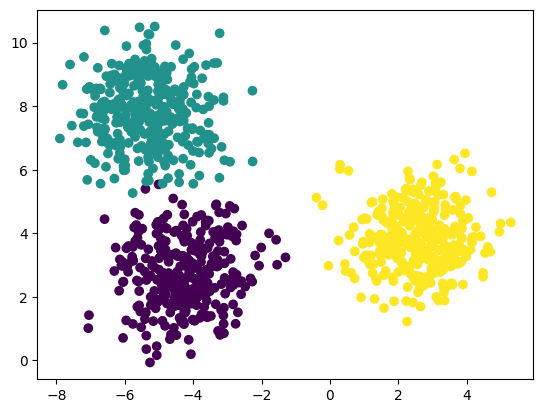

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization -- feature scaling technique

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled = scaler.fit_transform(X_train)

In [10]:
X_train_scaled

array([[-1.03687751, -0.96007871],
       [ 1.10747236, -0.06315849],
       [ 1.12171343, -0.47399404],
       ...,
       [ 1.30382875, -0.31693602],
       [-1.44307833,  1.05317059],
       [ 1.11235921, -0.94771649]])

In [11]:
X_test_scaled=scaler.transform(X_test)

In [12]:
from sklearn.cluster import KMeans

In [13]:
## elbow method

wcss = []
for k in range(1, 11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [14]:
wcss

[1340.0000000000002,
 573.2161961707614,
 171.48827385652706,
 139.72371499322838,
 114.16777853946975,
 90.75687837820203,
 81.66464758363182,
 74.29360018608173,
 67.4169234695772,
 60.713491395590296]

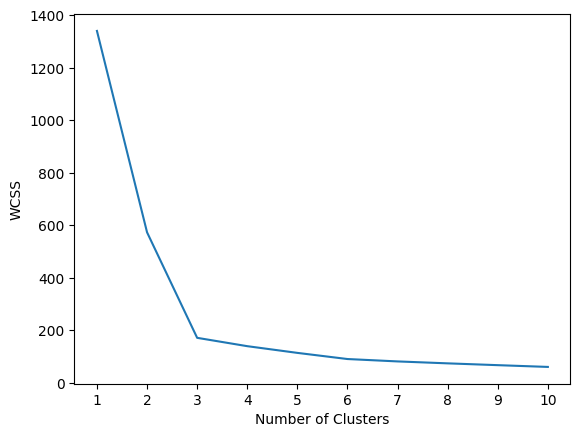

In [15]:
# plot elbow curve

plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
kmeans=KMeans(n_clusters=3, init="k-means++")

In [17]:
kmeans.fit_predict(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2,
       2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2,
       2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0,
       2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2,
       2, 1, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0,
       2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 0, 1,
       1, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 1,
       0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 1, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0,
       1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 1, 2,

In [18]:
y_pred=kmeans.predict(X_test_scaled)

In [19]:
y_pred

array([0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0,
       1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2,
       0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 2, 1,
       1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0,
       2, 1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1,
       0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0,
       0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 2,
       2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0,
       0, 1, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0,
       1, 2, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 2,
       0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 1,
       1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2,

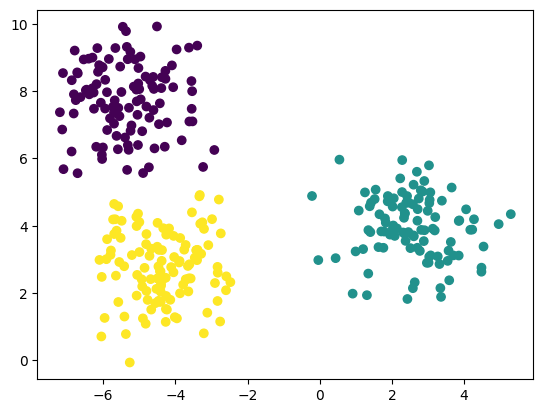

In [20]:
plt.scatter(X_test[:, 0], X_test[:,1],c=y_pred)  